# HR: Employee Attrition (EDA Only)

## Introduction


This is a Human Resource Management(HRM), Employee Attrition Analysis. In short, HRM is also referred to as people and talent management, is the strategic discipline focused on optimizing an organization’s human capital. It encompasses key functions such as recruitment, compensation, training, and employee retention, all of which contribute to workforce development and organizational success.

While retaining top talent is widely recognized as more cost-effective than hiring new employees, it remains one of the most complex challenges faced by HR professionals. Understanding the factors driving employee attrition is essential for developing effective retention strategies.


<b>Remark:<b> 

** The dataset is extracted from [IBM website](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/).
This dataset is entirely fictional and has been generated for educational and training purposes. Any resemblance to real-world data is purely coincidental.**

** Please note that this document only contains Data Cleaning and EDA, in-depth analysis will be on a separate dashboard and written report. ** 



### **Importing Pandas Library**

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Dataset**

In [171]:
df_attrition=pd.read_csv('HR-Employee-Attrition.csv')
df_attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [172]:
# Total number of rows and columns
df.shape

(1470, 39)

### **Summary Statistics**

In [173]:
# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['object']))

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

### **General information and checking for Null values**

In [174]:
# Display unique values per categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


In [175]:
# General dataset info (data types, missing values, etc.)
print(df.info())

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### **Summary of Entire Dataset**

In [176]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [177]:
# Attrition Summary
attrition_count=pd.DataFrame(df['Attrition'].value_counts())
attrition_count


,count
Attrition,
No,1233
Yes,237


## Data Cleaning

In [178]:
# Dropping Columns of No Use
df.drop(['EmployeeCount', 'EmployeeNumber'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,1,6,4,0,5,False,True,False,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,3,3,10,7,1,7,True,False,True,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,3,0,0,0,0,False,True,False,True
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,7,3,0,True,False,True,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,3,2,2,2,2,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,5,2,0,3,True,False,True,False
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,5,3,7,7,1,7,True,False,True,False
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,0,3,6,2,0,3,True,False,True,False
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,2,9,6,0,8,True,False,True,False


In [179]:
# Creating new columns "Yes" and "No" attrition column
attrition_dummies=pd.get_dummies(df['Attrition'])
attrition_dummies

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
1465,True,False
1466,True,False
1467,True,False
1468,True,False


In [180]:
# Combing both attrition columns
df=pd.concat([df,attrition_dummies],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes,No,Yes,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,False,True,False,True,False,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,True,False,True,False,True,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,False,True,False,True,False,True
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,True,False,True,False,True,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,True,False,True,False,True,False


In [146]:
# dropping attrition column with 'N0'
df.drop(['Attrition','No'],axis=1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,True,True
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,False,False
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,True,True
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,False,False
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,1,17,3,3,5,2,0,3,False,False
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,9,5,3,7,7,1,7,False,False
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,1,6,0,3,6,2,0,3,False,False
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,0,17,3,2,9,6,0,8,False,False


## **EDA**

### **Attrition Rate**

In [181]:
# Check attrition rate column
attrition_count = df["Attrition"].value_counts()
print(attrition_count)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


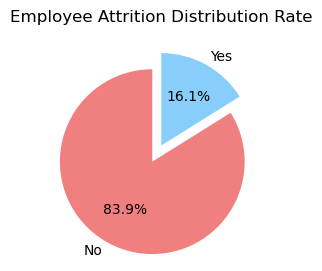

In [182]:
# Plot attrition rate pie chart

# Set figure size (width, height) in inches
plt.figure(figsize=(3, 3))  # Adjust this value to make the chart smaller

# Plot the pie chart
plt.pie(
    attrition_count.values,  # Extract values
    labels=attrition_count.index,  # Extract labels
    explode=(0.2, 0),  # Highlight first slice
    autopct='%1.1f%%',  # Show percentage labels
    startangle=90,  # Rotate for better layout
    colors=['lightcoral', 'lightskyblue']  # Optional color customization
)
plt.title("Employee Attrition Distribution Rate") 
plt.show()


#### Key Observations:
A small portion of employees are leaving, low attrition could indicate a stable workforce.
However, if attrition is concentrated in certain groups, it could signal HR or management issues.

### **Attrition Rate by Gender**

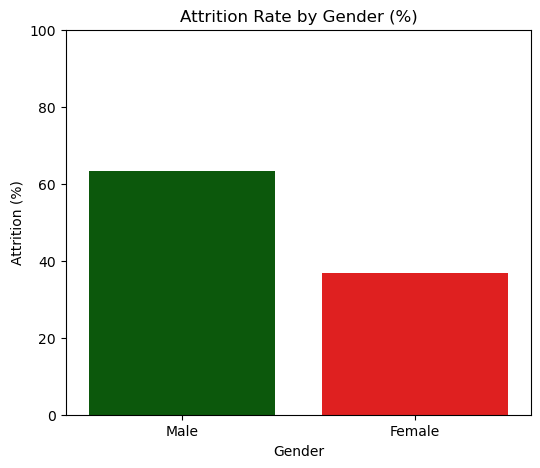

In [183]:
# Calculate attrition percentage by Gender
gender_attrition = df[df["Attrition"] == "Yes"]["Gender"].value_counts(normalize=True) * 100

# Convert to DataFrame for Seaborn
gender_attrition_df = gender_attrition.reset_index()
gender_attrition_df.columns = ["Gender", "Attrition (%)"]

# Plot bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x="Gender", y="Attrition (%)", data=gender_attrition_df, palette=["darkgreen", "red"])

# Formatting
plt.title("Attrition Rate by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Attrition (%)")
plt.ylim(0, 100)  # Set percentage scale
plt.show()


#### Observations:
Males have a slightly higher attrition rate than females. However, the difference is small, thus gender may not be the primary factor influencing attrition.

### Attrition Rate by Department**

<Axes: xlabel='Department', ylabel='Attrition (%)'>

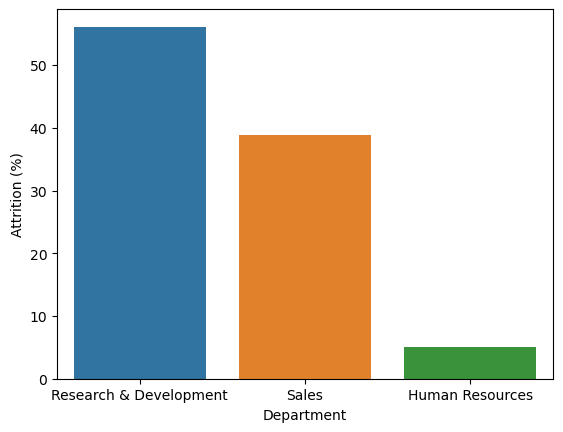

In [185]:
sns.barplot(x="Department", y="Attrition (%)", data=dept_attrition_df)

#### Key Observations:
R&D and Sales have higher attrition compared to Human Resources. R&D shows the highest attrition rate, indicating high turnover rate in technical roles which may be a concern and may impact the business in long term.

### **Attrition Rate and Monthly Income Correlation**

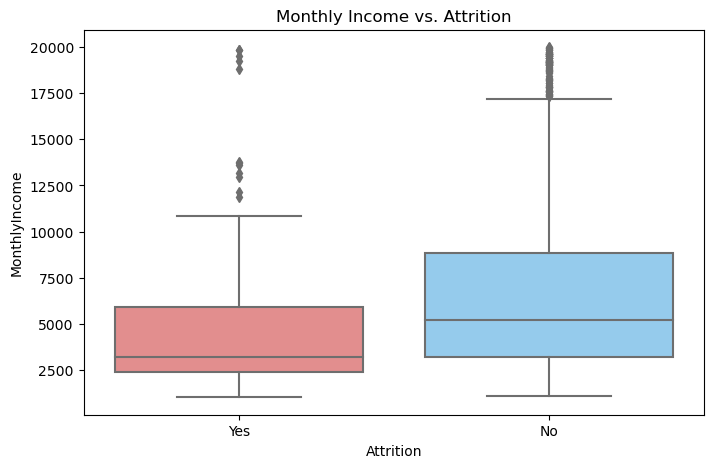

In [152]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette=["lightcoral", "lightskyblue"])
plt.title("Monthly Income vs. Attrition")
plt.show()


#### Key Observations:
Employees who left (Attrition = Yes) earn less on average than those who stayed.The median salary of retained employees is higher. More outliers in the high-income range for retained employees, indicating high earners are less likely to leave.


### **Work-Life Balance & OverTime Impact**

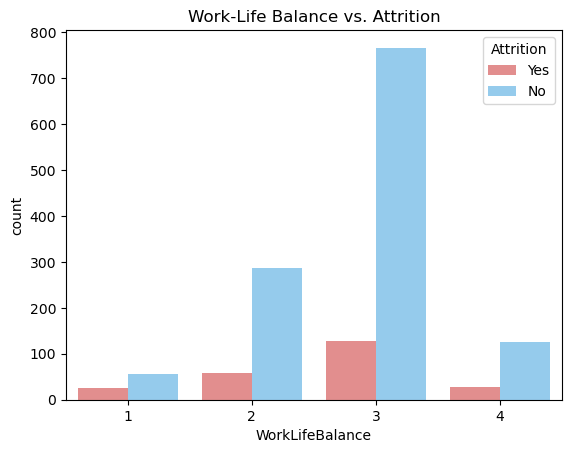

In [153]:
# Work-Life Balance vs. Attrition
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df,  palette=["lightcoral", "lightskyblue"])
plt.title("Work-Life Balance vs. Attrition")
plt.show()


#### Key Observations:
Employees with Work-Life Balance = 3 have the highest retention. Employees with Work-Life Balance = 1 & 2 have high attrition, while employees with WLB = 4 have lowest attrition, but their count is also low.

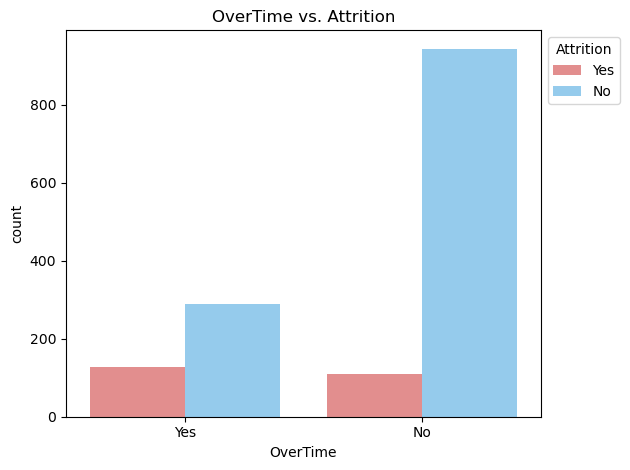

In [154]:
# OverTime Impact on Attrition
sns.countplot(x="OverTime", hue="Attrition", data=df, palette=["lightcoral", "lightskyblue"])
plt.title("OverTime vs. Attrition")

# Move legend to the right side
plt.legend(title="Attrition", loc="upper left", bbox_to_anchor=(1, 1))  # Moves legend outside plot

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.show()



#### Key Observations:
Employees who work overtime have significantly higher attrition. Employees without overtime have much lower attrition.

### **Employee Tenure & Promotion Impact**

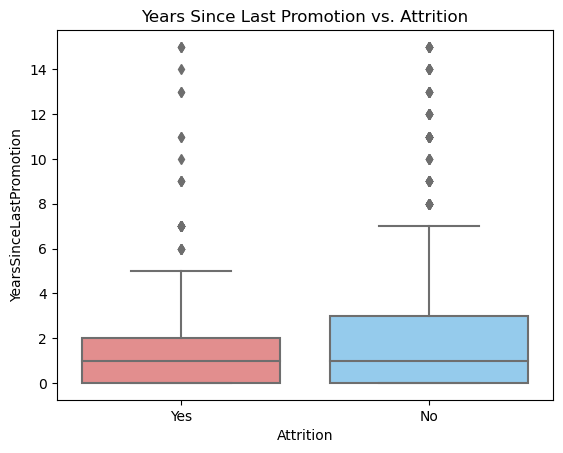

In [155]:
# Years Since Last Promotion vs. Attrition
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df, palette=["lightcoral", "lightskyblue"])
plt.title("Years Since Last Promotion vs. Attrition")
plt.show()



#### Key Observations:
Employees who left the company had fewer promotions. The majority of attrition cases had no recent promotions. Employees who stayed had a higher median time since their last promotion.


### **Job Satisfaction & Employee Retention**

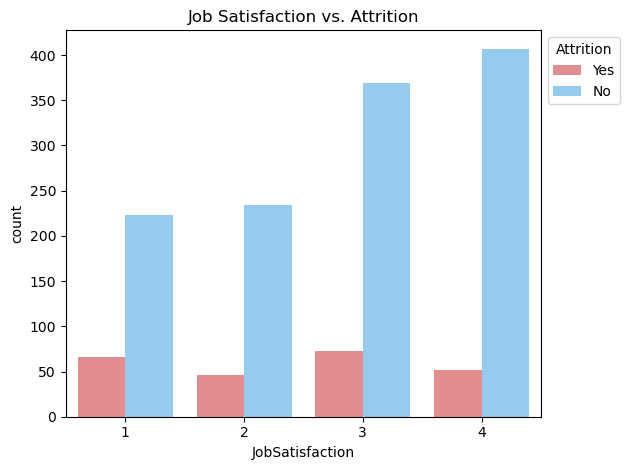

In [156]:
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette=["lightcoral", "lightskyblue"])
plt.title("Job Satisfaction vs. Attrition")
plt.legend(title="Attrition", loc="upper left", bbox_to_anchor=(1, 1))  # Moves legend outside plot
plt.tight_layout()
plt.show()


#### Key Observations:
Employees with higher job satisfaction (2 & 4) have lower attrition. Employees with low job satisfaction (1 & 3) leave more frequently.

### **Attrition Rate by Frequent Business Traveling**

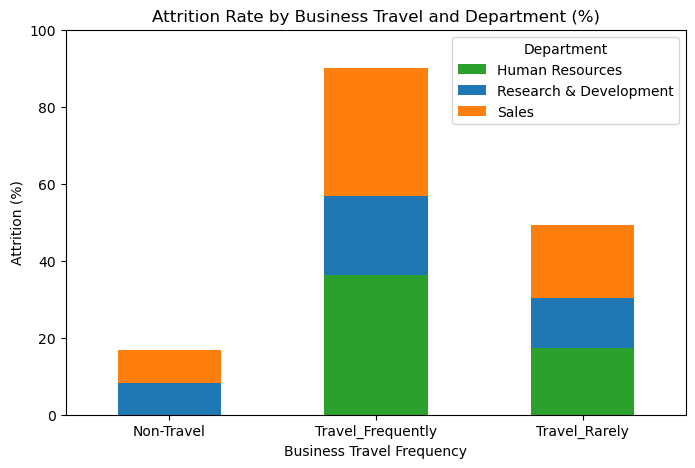

In [200]:
# Define custom department colors to match previous chart
department_colors = {
    "Research & Development": "#1f77b4",  # Blue
    "Sales": "#ff7f0e",  # Orange
    "Human Resources": "#2ca02c"  # Green
}

# Create a crosstab to calculate attrition percentage by Business Travel & Department
attrition_by_travel_dept = pd.crosstab(index=df["BusinessTravel"], 
                                       columns=df["Department"], 
                                       values=(df["Attrition"] == "Yes"),  # Convert "Yes" to Boolean (1/0)
                                       aggfunc="mean") * 100  # Convert to percentages

# Plot stacked bar chart with department colors
ax = attrition_by_travel_dept.plot(kind="bar", stacked=True, figsize=(8, 5), color=[department_colors[dept] for dept in attrition_by_travel_dept.columns])

# Formatting
plt.title("Attrition Rate by Business Travel and Department (%)")
plt.xlabel("Business Travel Frequency")
plt.ylabel("Attrition (%)")
plt.legend(title="Department")
plt.ylim(0, 100)  # Set percentage scale
plt.xticks(rotation=0)  # Keep x-labels readable

plt.show()



#### Key Observations:
Employees mainly from HR and Sales who travel frequently have the highest attrition rate and employees who travel rarely or don’t travel have lower attrition.